# 演習3-3

Scikit learn の DecisionTreeClassifier を用いて決定木を作成します。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import sklearn.datasets as ds
from sklearn import tree
from sklearn.model_selection import cross_val_score
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## データの読み込み

sklearn.datasetsパッケージには5種類のToy dataset(boston, iris, diabetes, disits, linnerud)や乱数でデータを生成するモジュールなどが含まれています。irisデータはload_iris関数を使って読み込みます。

In [2]:
iris = ds.load_iris()

ここで、変数irisは学習データのオブジェクトで、data(特徴ベクトル)、target（教師ベクトル）、DESCR（説明）などの属性を持ちます。

## 学習

決定木を作成します。基本的な手順は、識別器を実現したクラスのインスタンスclfを生成し、特徴ベクトルと教師ベクトルを引数としてfitメソッドを呼び出します。

In [3]:
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 評価

交差確認法を実行するには、cross_val_score関数を、識別器、特徴ベクトル、教師ベクトル、交差数を引数として与えて呼び出します。戻り値は交差数を長さとする1次元ndarrayなので、平均や標準偏差を求めるメソッドを呼び出せば、集計が簡単に行えます。

In [4]:
scores = cross_val_score(clf, iris.data, iris.target, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.960 (std: 0.044)



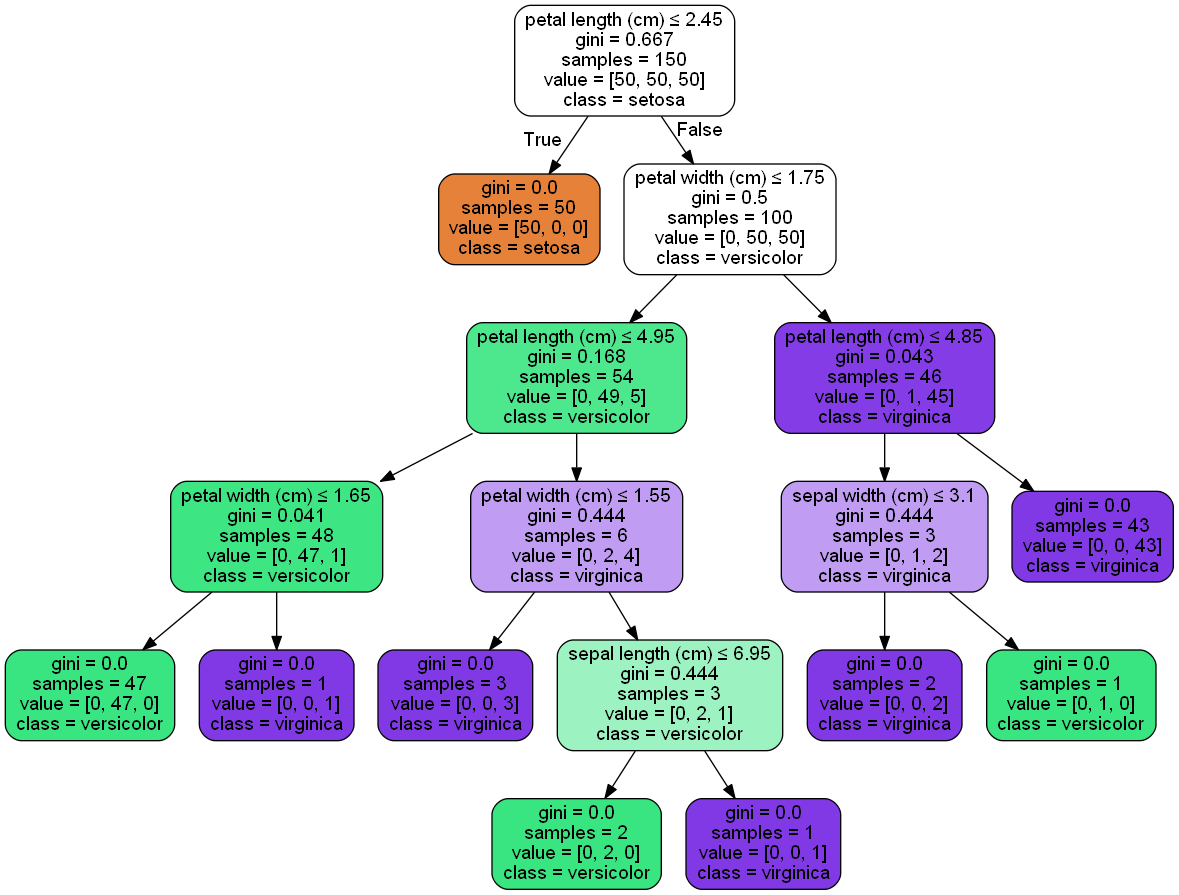

In [5]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

## 学習パラメータの変更

学習パラメータは、識別器のコンストラクタ引数として与えます。ここでは、深さを制限して単純化してみます。

In [6]:
clf2 = tree.DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf2, iris.data, iris.target, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.947 (std: 0.050)



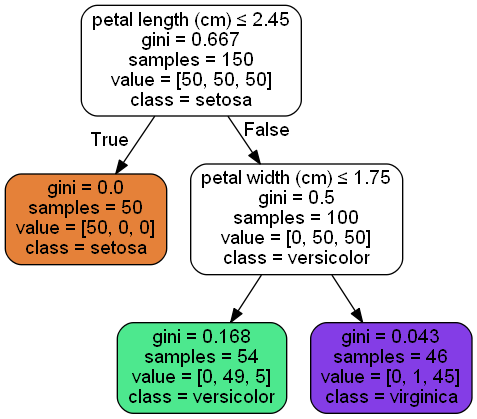

In [7]:
clf2.fit(iris.data, iris.target)
dot_data = export_graphviz(clf2, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 